As we can see, the trajectory is a circle, with a little bit of translation from the origin.


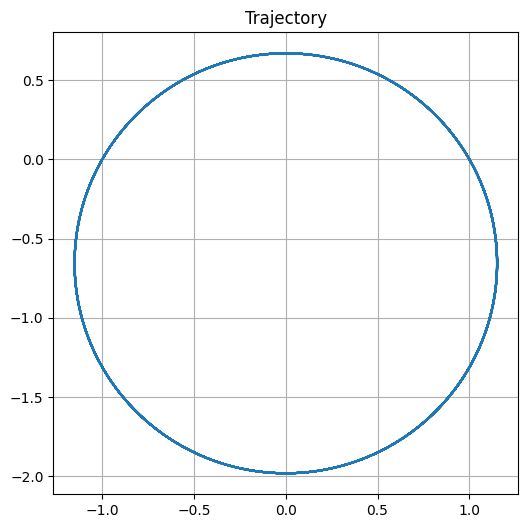

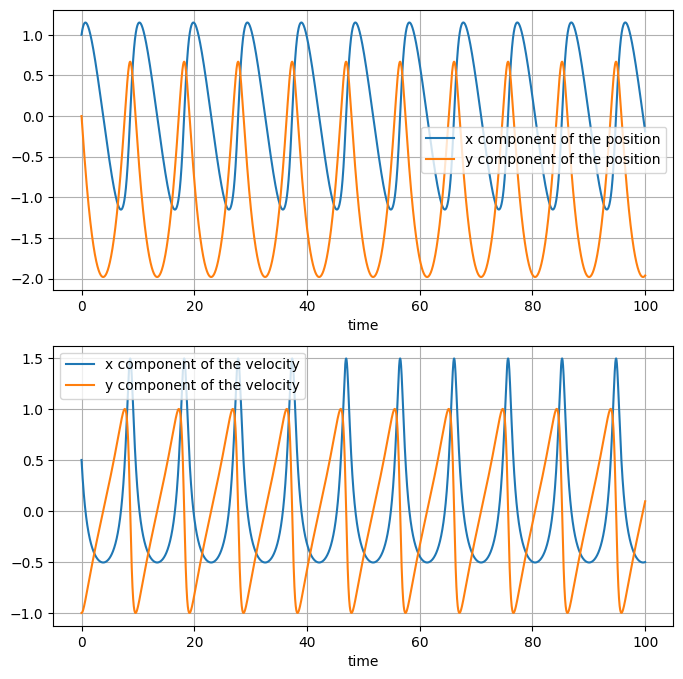

In [1]:
# Exercise 5.1
# Author: Felix Cahyadi
# Date: 16.10.2023

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Define the function for the acceleration
def ddx(x):
    """ This is the function that calculates the acceleration of the object

    Args:
        x (NDarray): The coordinate of the object

    Returns:
        acc: The acceleration vector
    """
    acc = -x/norm(x,2)**3 # to calculate the magnitude of the vector
    return acc

# Define the function for the implicit Euler method
def imp_euler(func, t, x0, dx0):
    """ Function for the implicit Euler method

    Args:
        func (function): The equation for d^2x/dt^2
        t (NDarray): Array containing timesteps
        x0 (NDarray): Initial position
        dx0 (NDarray): Initial velocity

    Returns:
        x, dx: position and velocity array
    """
    deltat = t[1]-t[0]

    x = np.zeros((len(x0), len(t))) # Create arrays to contain x
    dx = np.zeros((len(dx0), len(t))) # Create arrays to contain dx/dt
    x[:,0] = x0 # Initialize the position
    dx[:,0] = dx0 # Initialize the velocity

    for i in range(1,len(t)):
        dx[:,i] = dx[:,i-1] + deltat*func(x[:,i-1])
        x[:,i] = x[:,i-1] + deltat*dx[:,i] # semi-implicit euler method use i instead of i-1
    
    return x,dx

# Initialize the position and velocity
t = np.linspace(0,100,10000)
x0 = np.array([1.0,0.0])
dx0 = np.array([0.5,-1.0])

x, dx = imp_euler(ddx, t, x0, dx0)

print("As we can see, the trajectory is a circle, with a little bit of translation from the origin.")

# Plot the result
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(x[0,:], x[1,:])
ax.set_title("Trajectory")
ax.grid(True)

# Plot the position and velocities over time
fig2, ax2 = plt.subplots(nrows=2, ncols=1, figsize = (8,8))
ax2[0].plot(t,x[0,:], label = "x component of the position")
ax2[0].plot(t,x[1,:], label = "y component of the position")
ax2[0].set_xlabel("time")
ax2[0].grid(True)
ax2[0].legend()

ax2[1].plot(t,dx[0,:], label = "x component of the velocity")
ax2[1].plot(t,dx[1,:], label = "y component of the velocity")
ax2[1].set_xlabel("time")
ax2[1].grid(True)
ax2[1].legend()
plt.show()

The value of $y(1)$ from the simulation is 0.173994
The difference with the analytical value is -0.000000 at 27 steps.


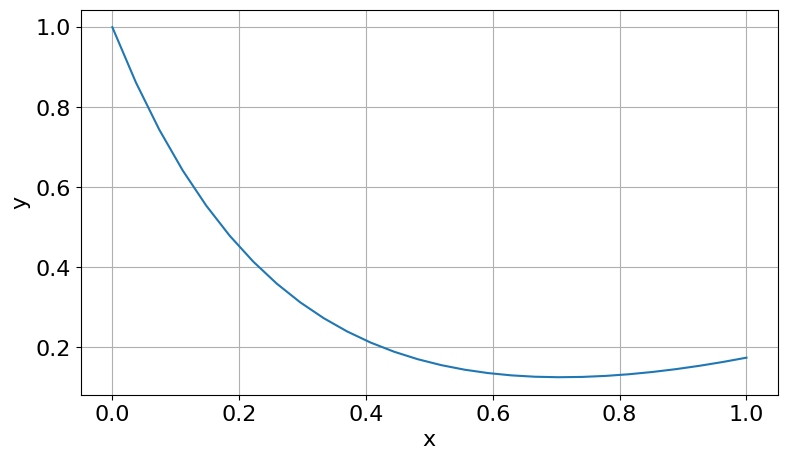

In [2]:
# Exercise 5.2
# Author: Felix Cahyadi
# Date: 16.10.2023

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from rk4 import rk4

# Define the differential equation
def dydx(x,y):
    
  dy = (x**2) - 4*y
  return dy


# Run the RK algorithm
x_0 = 0
x_1 = 1
y_0 = np.array([1.0])
num_step = 27
h = (x_1 - x_0)/num_step

x_sol, y_sol = rk4(dydx, x_0, x_1, y_0, h)

# The analytical value of y(1)
analytical_y1 = 0.17399327517346125

# Print y(1)
print(f"The value of $y(1)$ from the simulation is {y_sol[-1][0]:.6f}\nThe difference with the analytical value is {analytical_y1 - y_sol[-1][0]:.6f} at {num_step} steps.")

# Plot the result
fig, ax = plt.subplots(figsize = (9,5))
ax.plot(x_sol,y_sol)
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.tick_params("both", labelsize = 16)
ax.grid(True)



These are the trajectories, the final coordinates are 
y = 0.28916477260112927, 
y' = 0.349170742453133, 
y'' = 0.5515769080153823, 
y''' = 1.0745791652577426


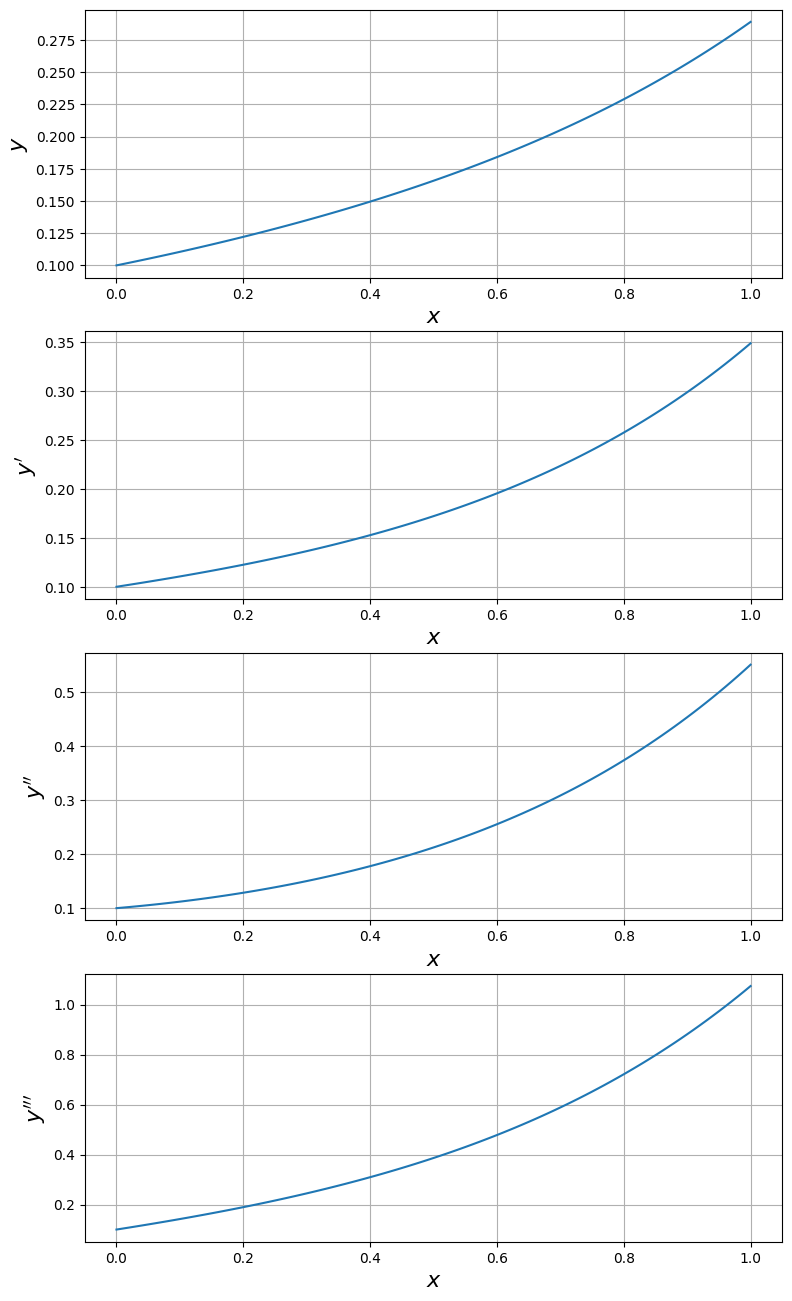

In [20]:
# Exercise 5.3
# Author: Felix Cahyadi
# Date: 16.10.2023

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from rk4 import rk4

# Define the differential equation
def dydx(x,y):
    
    return np.array([y[1],y[2],y[3],4*y[2]*np.sqrt(1-y[0]**2)])

# Run the RK algorithm
x_0 = 0
x_1 = 1
y_0 = np.array([0.1,0.1,0.1,0.1])
num_step = 100
h = (x_1 - x_0)/num_step

x_sol, y_sol = rk4(dydx=dydx, x0=x_0, x1 = x_1, y = y_0, h = h)

print(f"These are the trajectories, the final coordinates are \ny = {y_sol[-1,0]}, \ny' = {y_sol[-1,1]}, \ny'' = {y_sol[-1,2]}, \ny''' = {y_sol[-1,3]}")

# Plot the trajectories
fig, ax = plt.subplots(nrows=4, ncols=1, figsize = (9,16))

ax[0].plot(x_sol, y_sol[:,0])
ax[0].grid(True)
ax[0].set_xlabel('$x$', fontsize = 16)
ax[0].set_ylabel("$y$", fontsize = 16)

ax[1].plot(x_sol, y_sol[:,1])
ax[1].grid(True)
ax[1].set_xlabel('$x$', fontsize = 16)
ax[1].set_ylabel("$y'$", fontsize = 16)

ax[2].plot(x_sol, y_sol[:,2])
ax[2].grid(True)
ax[2].set_xlabel('$x$', fontsize = 16)
ax[2].set_ylabel("$y''$", fontsize = 16)

ax[3].plot(x_sol, y_sol[:,3])
ax[3].grid(True)
ax[3].set_xlabel('$x$', fontsize = 16)
ax[3].set_ylabel("$y'''$", fontsize = 16)

plt.show()



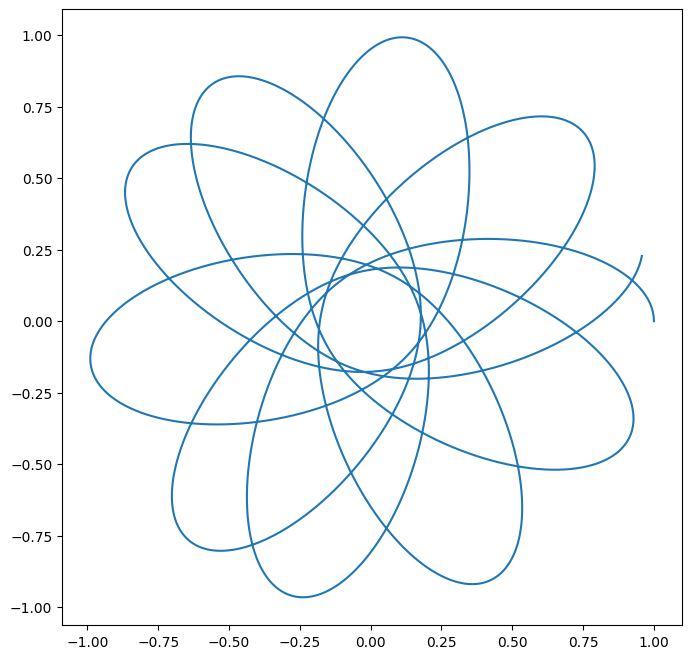

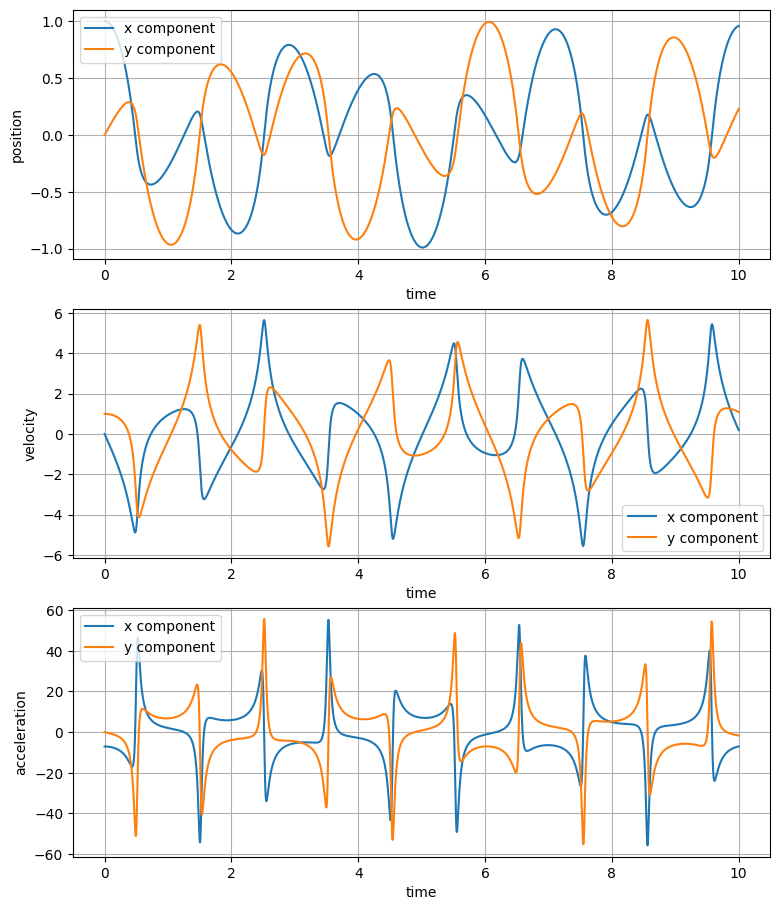

In [36]:
# Exercise 5.4
# Author: Felix Cahyadi
# Date: 16.10.2023

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Define the function for acceleration
def acceleration(x, G = 1, M = 10, L = 2):

    r = norm(x,2)
    ddx = -G*M*(x/((r**2)*np.sqrt(r**2 + (L**2/4))))

    return ddx

# Velocity verlet integration
def vel_verlet(accel, t, x0, v0):
    
    # define delta t
    deltat = t[1] - t[0]

    # Initiate arrays
    x_arr = np.zeros((len(x0), len(t)))
    v_arr = np.zeros((len(v0), len(t)))
    a_arr = np.zeros((len(x0), len(t)))

    # Initial values
    x_arr[:,0] = x0
    v_arr[:,0] = v0
    a_arr[:,0] = accel(x0)

    # Solve using verlet integration 
    for i in range(1, len(t)):
        x_arr[:,i] = x_arr[:,i-1] + v_arr[:,i-1]*deltat + 0.5*a_arr[:,i-1]*(deltat**2)
        a_arr[:,i] = accel(x_arr[:,i])
        v_arr[:,i] = v_arr[:,i-1] + 0.5*(a_arr[:,i-1]+a_arr[:,i])*deltat

    return x_arr, v_arr, a_arr

# Run the integration
t = np.linspace(0,10, 10000)
x0 = np.array([1,0])
v0 = np.array([0,1])

x_sol, v_sol, a_sol = vel_verlet(acceleration, t, x0, v0)

# Plot the solution
fig_traj, ax_traj = plt.subplots(figsize = (8,8))
ax_traj.plot(x_sol[0,:], x_sol[1,:])


# Plot the values of position, velocity, and acceleration w.r.t. time
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (9,11))

ax[0].plot(t, x_sol[0,:], label = 'x component')
ax[0].plot(t, x_sol[1,:], label = 'y component')
ax[0].grid(True)
ax[0].set_xlabel("time")
ax[0].set_ylabel("position")
ax[0].legend()

ax[1].plot(t, v_sol[0,:], label = 'x component')
ax[1].plot(t, v_sol[1,:], label = 'y component')
ax[1].grid(True)
ax[1].set_xlabel("time")
ax[1].set_ylabel("velocity")
ax[1].legend()

ax[2].plot(t, a_sol[0,:], label = 'x component')
ax[2].plot(t, a_sol[1,:], label = 'y component')
ax[2].grid(True)
ax[2].set_xlabel("time")
ax[2].set_ylabel("acceleration")
ax[2].legend()

plt.show()
    
